In [1]:
# load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
# summary of data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [3]:
# more details of data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

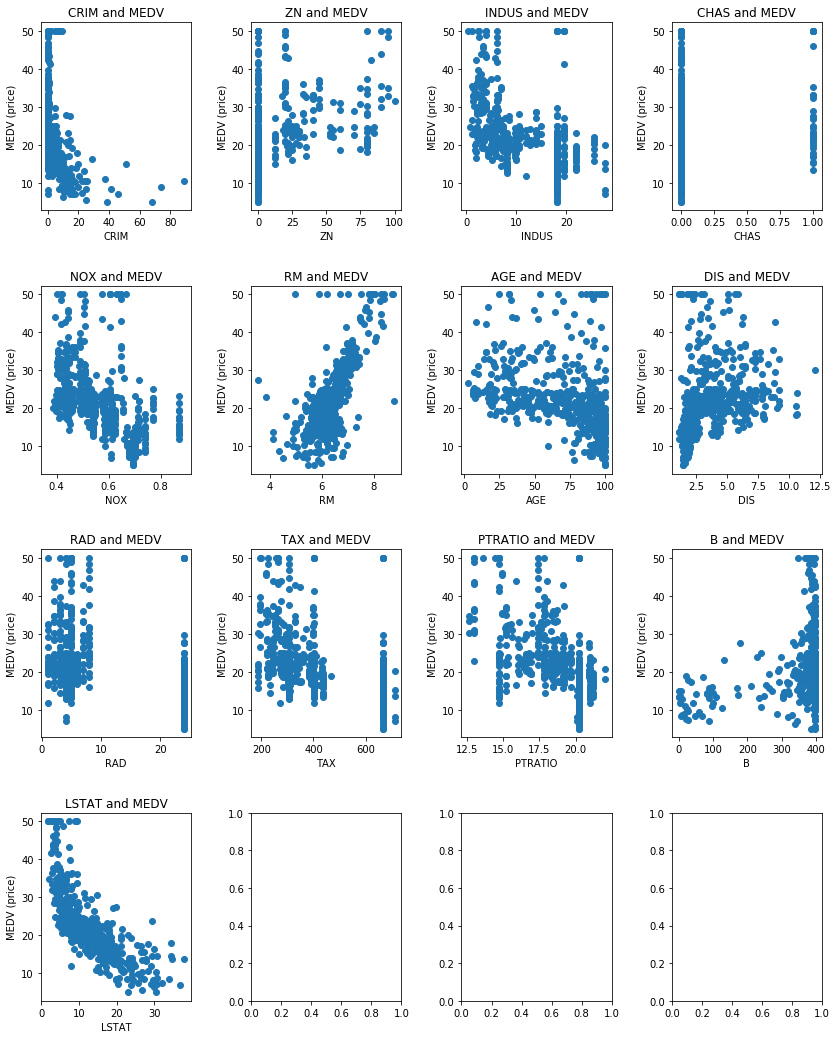

In [7]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()


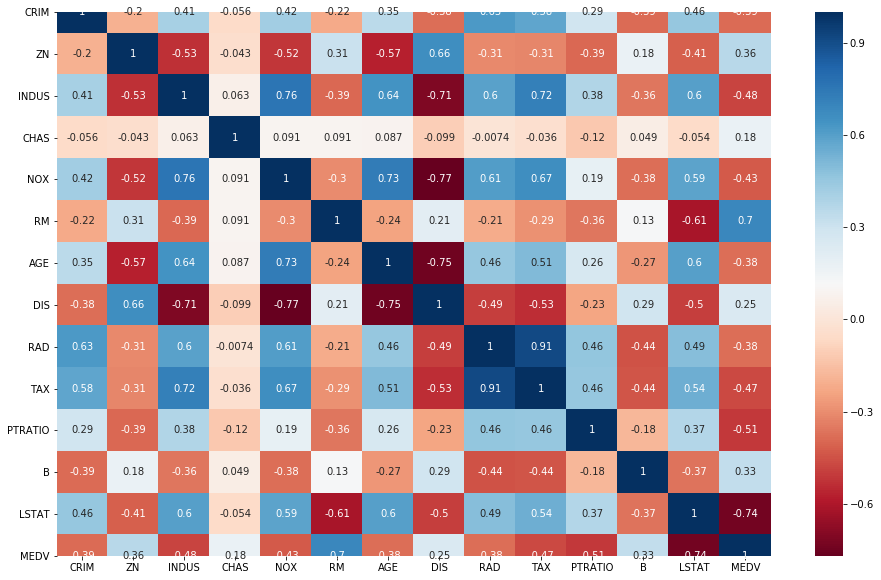

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

import numpy as np
#Add one additional column in X for bias
X_train = np.insert(X_train,0,1,axis=1) 
X_test  = np.insert(X_test,0,1,axis=1) 

#Add one more entry to boston.feature_names to include BIAS
boston.feature_names = np.insert(boston.feature_names, 0,"BIAS")


In [26]:
# 2.3 linear regression and ridge regression
import numpy as np

def least_square(X, y):
    #TODO
    theta = np.zeros((X.shape[1],1))
    theta = np.linalg.inv(X.T@X)@(X.T@y)
    return theta

def ridge_reg(X, y, eta):
    #TODO
    I = np.identity(X.shape[1])
    I = I*(eta/2)
    theta = np.linalg.inv(X.T@X + I)@(X.T@y)
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
#df_theta
print(df_theta)
print("\n")


# apply ridge regression
theta_r = ridge_reg(X_train, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])
#df_theta_r
print(df_theta_r)



    Feature      Coeff
0      BIAS  32.756193
1      CRIM  -0.108934
2        ZN   0.053133
3     INDUS   0.023440
4      CHAS   2.488903
5       NOX -12.228308
6        RM   3.880905
7       AGE  -0.008650
8       DIS  -1.392799
9       RAD   0.272090
10      TAX  -0.011167
11  PTRATIO  -0.934401
12        B   0.010577
13    LSTAT  -0.559851


    Feature     Coeff
0      BIAS  2.806049
1      CRIM -0.100979
2        ZN  0.054729
3     INDUS  0.009770
4      CHAS  2.219564
5       NOX  0.264179
6        RM  5.522153
7       AGE -0.010481
8       DIS -0.930319
9       RAD  0.172062
10      TAX -0.009316
11  PTRATIO -0.451220
12        B  0.015037
13    LSTAT -0.495838


In [27]:
# 2.4 evaluation
def pred_fn(X, theta):
    #TODO
    pred = np.dot(X,theta)
    return pred

def root_mean_square_error(pred, y):
    #TODO
    rmse = np.dot((y-pred),(y-pred))
    rmse = rmse/(y.size)
    rmse = np.sqrt(rmse)
    return rmse

pred_lin_X_train = pred_fn(X_train,theta)
rmse_lin_X_train = root_mean_square_error(pred_lin_X_train,y_train)
print(rmse_lin_X_train)

pred_lin_X_test = pred_fn(X_test,theta)
rmse_lin_X_test = root_mean_square_error(pred_lin_X_test,y_test)
print(rmse_lin_X_test)

pred_ridge_X_train = pred_fn(X_train,theta_r)
rmse_ridge_X_train = root_mean_square_error(pred_ridge_X_train,y_train)
print(rmse_ridge_X_train)

pred_ridge_X_test = pred_fn(X_test,theta_r)
rmse_ridge_X_test = root_mean_square_error(pred_ridge_X_test,y_test)
print(rmse_ridge_X_test)

4.63142853427834
4.869926172570564
4.7954340594793115
5.160337823067214


In [20]:
# 2.5 linear models of top-3 features
#Top three features = RM(6), PTRATIO(11), LSTAT(13)

X_train_top3 = X_train[:,[0,6,11,13]]
X_test_top3  = X_test[:,[0,6,11,13]]

# linear regression using top-3 features
#TODO
theta = least_square(X_train_top3, y_train)
df_theta = pd.DataFrame(zip(['BIAS','RM','PTRATIO','LSTAT'], theta),columns=['Feature','Coeff'])
print(df_theta)

print("\n")

# ridge regression using top-3 features
#TODO
theta_r = ridge_reg(X_train_top3, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(['BIAS','RM','PTRATIO','LSTAT'], theta_r),columns=['Feature','Coeff'])
#df_theta_r
print(df_theta_r)

print("\n")

pred_lin_X_train = pred_fn(X_train_top3,theta)
rmse_lin_X_train = root_mean_square_error(pred_lin_X_train,y_train)
print("RMSE Linear Train(top3 features)=", rmse_lin_X_train)

pred_lin_X_test = pred_fn(X_test_top3,theta)
rmse_lin_X_test = root_mean_square_error(pred_lin_X_test,y_test)
print("RMSE Linear Test(top 3 features)=",rmse_lin_X_test)

pred_ridge_X_train = pred_fn(X_train_top3,theta_r)
rmse_ridge_X_train = root_mean_square_error(pred_ridge_X_train,y_train)
print("RMSE Ridge Train(top 3 features)=", rmse_ridge_X_train)

pred_ridge_X_test = pred_fn(X_test_top3,theta_r)
rmse_ridge_X_test = root_mean_square_error(pred_ridge_X_test,y_test)
print("RMSE Ridge Test(top 3 features)=",rmse_ridge_X_test)

   Feature      Coeff
0     BIAS  21.660211
1       RM   4.380279
2  PTRATIO  -1.012630
3    LSTAT  -0.624712


   Feature     Coeff
0     BIAS  3.432268
1       RM  5.960704
2  PTRATIO -0.614272
3    LSTAT -0.559306


RMSE Linear Train(top3 features)= 5.121813241883696
RMSE Linear Test(top 3 features)= 5.461011696363116
RMSE Ridge Train(top 3 features)= 5.231140971553095
RMSE Ridge Test(top 3 features)= 5.453867994134054


In [52]:
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

X_train2 = np.insert(X_train2,0,1,axis=1) 
X_val  = np.insert(X_val,0,1,axis=1) 
X_test  = np.insert(X_test,0,1,axis=1) 
print(X_train2.shape)
print(X_val.shape)
print(X_test.shape)
print("\n")

#Add one feature  - The square root of 1 top feature LSTAT
newfeature = np.sqrt(X_train2[:,[13]])
X_train2 = np.append(X_train2,newfeature, axis=1)

newfeature = np.sqrt(X_val[:,[13]])
X_val = np.append(X_val,newfeature, axis=1)

theta1 = least_square(X_train2, y_train2)

pred_X_train = pred_fn(X_train2,theta1)
rmse_X_train = root_mean_square_error(pred_X_train,y_train2)
print("RMSE Linear Train(1 new feature)=", rmse_X_train)

pred_X_val = pred_fn(X_val,theta1)
rmse_X_val = root_mean_square_error(pred_X_val,y_val)
print("RMSE Linear Val(1 new feature)=", rmse_X_val)


#Add three features - The square roots of LSTAT,RM and PTRATIO 
newfeatures = np.sqrt(X_train2[:,[6,11]])
X_train2 = np.append(X_train2,newfeatures, axis=1)

newfeatures = np.sqrt(X_val[:,[6,11]])
X_val = np.append(X_val,newfeatures, axis=1)

theta3 = least_square(X_train2, y_train2)

pred_X_train = pred_fn(X_train2,theta3)
rmse_X_train = root_mean_square_error(pred_X_train,y_train2)
print("RMSE Linear Train(3 new feature)=", rmse_X_train)

pred_X_val = pred_fn(X_val,theta3)
rmse_X_val = root_mean_square_error(pred_X_val,y_val)
print("RMSE Linear Val(3 new feature)=", rmse_X_val)


#Using theta3 on the Xtest
newfeatures = np.sqrt(X_test[:,[13,6,11]])
X_test2 = np.append(X_test,newfeatures, axis=1)
print(X_test.shape)
print(X_test2.shape)
print(theta3.shape)
print(X_val.shape)
pred_X_test2 = pred_fn(X_test2,theta3)
rmse_X_test = root_mean_square_error(pred_X_test2,y_test)
print("RMSE Linear Test(3 new feature)=", rmse_X_test)



(283, 14)
(71, 14)
(152, 14)


RMSE Linear Train(1 new feature)= 4.281095453069774
RMSE Linear Val(1 new feature)= 3.274483294261794
RMSE Linear Train(3 new feature)= 3.956973043960577
RMSE Linear Val(3 new feature)= 2.8550718572630895
(152, 14)
(152, 17)
(17,)
(71, 17)
RMSE Linear Test(3 new feature)= 4.143961218064651
